In [1]:
'''ST10134058 Shivam Mayur Pillay Part 2 PDAN8411 POE'''
print()

In [2]:
#what is classifiction in ML

In [3]:
# reference the data set
'''




(Parmar, 2018)
'''
print()

In [4]:
# why the data set is appropriate for classification

In [5]:
# what analysis is going to be performed on the dataset. What is the question that the analysis will answer?

In [6]:
'''
Imports
Pandas organizes data into a format which is readable and manageable (The Pandas Development Team, 2022a)

'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


'''
make note to explain why we use GausianNB ant not the other 2!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
'''
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

'\nmake note to explain why we use GausianNB ant not the other 2!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n'

In [7]:
'''
Using a fucntion in Pandas we read a CSV file and organise the data

Please download the CSV file from the link below and save the file in the same folder where POE Part 2 is saved

Download Link: https://www.kaggle.com/datasets/rajyellow46/wine-quality/download

'''

df=pd.read_csv('winequalityN.csv')

# (Refsnes Data, 2022)

In [8]:
''' Show the variables in dataset with the 1st 5 observations'''

df.head(5)

# (The Pandas Development Team, 2022e)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
'''
Show the number of observations and variables

From the information below we can see that there are 500 observations and 9 different varibales in the data set
'''

df.shape

# (The Pandas Development Team, 2022g)

(6497, 13)

In [10]:
'''
List the columns
'''

df.columns

# (The Pandas Development Team, 2022b)

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [11]:
'''Print out a summary of the variable types'''

df.info()

# (The Pandas Development Team, 2022f)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [12]:
'''
The dependent variable we will look at is the quality of the wine, we will consider this value as y

The quality of the wine was rated on a scale from (0 to 10) however the min and max values seen are 3 and 9

We need to see the distribution of the quality ratings by doing a count 
'''


df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [13]:
'''
Quality will be set as the dependent variable (y) 

I will adjust the dependent to read all quality ratings in the following way:

qaulity between 0 and 5 as low --- Showing that this is a low qaulity wine
quality between 6 and 7 as medium --- Showing that this is a medium qaulity wine
quality between 8 and 10 as high --- Showing that this is a high qaulity wine
'''

df['quality'] = df.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')


# (Burgaud, 2022)
# (DataCamp Team, 2020)




In [14]:

'''
Show the number of observations which fall in the 3 new categories
'''

print(df['quality'].value_counts())

# (Marsja, 2020)

medium    3915
low       2384
high       198
Name: quality, dtype: int64


In [15]:
'''
Check for feilds with no values

Output below shows no missing feilds
'''

print(df.isna().sum()) 

# (Shin, 2020)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [16]:
'''
show the number of obsertvations after the drop (if we drop all observations with at least 1 missing value)
'''
df.dropna().shape

(6463, 13)

In [17]:
'''
Find the number of observations lost at each category level when dropping observations with at least one missing value

'''
df2 = df.copy()
df2.dropna(inplace=True)
dfcount=df['quality'].value_counts()
dfcount2=df2['quality'].value_counts()
totalPchange=len(df2.index)/(len(df.index))-1

print('Total percentage of observations lost')
print('{0:.4f}'.format(totalPchange))
print()
print('Count before dropping missing')
print(dfcount)
print()
print('Count after dropping missing')
print(dfcount2)
print()
print('Percentage of lost values change')
print((dfcount2/dfcount)-1)

Total percentage of observations lost
-0.0052

Count before dropping missing
medium    3915
low       2384
high       198
Name: quality, dtype: int64

Count after dropping missing
medium    3894
low       2372
high       197
Name: quality, dtype: int64

Percentage of lost values change
medium   -0.005364
low      -0.005034
high     -0.005051
Name: quality, dtype: float64


In [18]:
''' 
As per above there is only half a percent of the observations in each category level

Therefore drop the rows with missing values
'''
df.dropna(inplace=True)

In [19]:
print(df.isna().sum())


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [20]:
'''
Print out a summary of the each variable's statistics and round to 4 decimal places

This is done to understand a summary of all the observations by each variable in the data set
'''


df.describe().apply(lambda s: s.apply('{0:.4f}'.format))

# (DataScience Made Simple, 2022)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000,6463.0000
mean,7.2178,0.3396,0.3188,5.4440,0.0561,30.5169,115.6945,0.9947,3.2183,0.5311,10.4928
std,1.2979,0.1646,0.1453,4.7569,0.0351,17.7588,56.5267,0.0030,0.1606,0.1489,1.1931
min,3.8000,0.0800,0.0000,0.6000,0.0090,1.0000,6.0000,0.9871,2.7200,0.2200,8.0000
25%,6.4000,0.2300,0.2500,1.8000,0.0380,17.0000,77.0000,0.9923,3.1100,0.4300,9.5000
50%,7.0000,0.2900,0.3100,3.0000,0.0470,29.0000,118.0000,0.9949,3.2100,0.5100,10.3000
75%,7.7000,0.4000,0.3900,8.1000,0.0650,41.0000,156.0000,0.9970,3.3200,0.6000,11.3000
max,15.9000,1.5800,1.6600,65.8000,0.6110,289.0000,440.0000,1.0390,4.0100,2.0000,14.9000


In [21]:
'''
Show the correlation between each varible in the data set
'''

df.corr().apply(lambda s: s.apply('{0:.4f}'.format))

# (The Pandas Development Team, 2022c)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.0000,0.2211,0.3237,-0.1134,0.2991,-0.2835,-0.3305,0.4597,-0.2511,0.3013,-0.0962
volatile acidity,0.2211,1.0000,-0.3775,-0.1967,0.3780,-0.3534,-0.4147,0.2721,0.2601,0.2257,-0.0395
citric acid,0.3237,-0.3775,1.0000,0.1423,0.0394,0.1323,0.1944,0.0971,-0.3279,0.0591,-0.0101
residual sugar,-0.1134,-0.1967,0.1423,1.0000,-0.1288,0.4034,0.4957,0.5515,-0.2665,-0.1856,-0.3591
chlorides,0.2991,0.3780,0.0394,-0.1288,1.0000,-0.1954,-0.2796,0.3631,0.0447,0.3962,-0.2577
free sulfur dioxide,-0.2835,-0.3534,0.1323,0.4034,-0.1954,1.0000,0.7215,0.0251,-0.1452,-0.1889,-0.1795
total sulfur dioxide,-0.3305,-0.4147,0.1944,0.4957,-0.2796,0.7215,1.0000,0.0314,-0.2372,-0.2759,-0.2644
density,0.4597,0.2721,0.0971,0.5515,0.3631,0.0251,0.0314,1.0000,0.0125,0.2600,-0.6874
pH,-0.2511,0.2601,-0.3279,-0.2665,0.0447,-0.1452,-0.2372,0.0125,1.0000,0.1909,0.1205
sulphates,0.3013,0.2257,0.0591,-0.1856,0.3962,-0.1889,-0.2759,0.2600,0.1909,1.0000,-0.0041


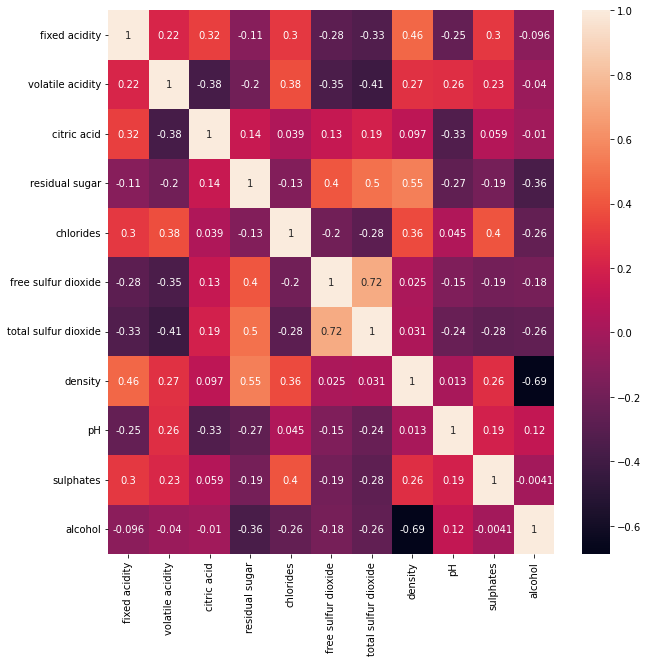

In [22]:
'''
Plot the data onto heatmap
'''

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# (Data To Fish, 2020)

In [23]:
'''
Set quality to = y (as this is the dependent) and set the rest of the variables to x (the independent)
'''

y=df['quality']
x=df[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]


In [24]:
'''
Split into Training and Testing sets
'''

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)



In [25]:
'''
Test GNB

gnb=GaussianNB()
gnb.fit(x_train, y_train)
gnbs=gnb.score(x_test,y_test)

gnb.predict(x_test)
y_pred = gnb.predict(x_test)
#score = accuracy_score(y_test, y_pred)
'''


'\nTest GNB\n\ngnb=GaussianNB()\ngnb.fit(x_train, y_train)\ngnbs=gnb.score(x_test,y_test)\n\ngnb.predict(x_test)\ny_pred = gnb.predict(x_test)\n#score = accuracy_score(y_test, y_pred)\n'

In [26]:
from sklearn.model_selection import cross_val_score

cls_nb=GaussianNB()
cls_nb.fit(x_train,y_train.ravel())

cross_val_score(estimator=cls_nb,x=x_train,y=y_train.ravel(),cv=7).mean()

TypeError: cross_val_score() got an unexpected keyword argument 'x'